In [4]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


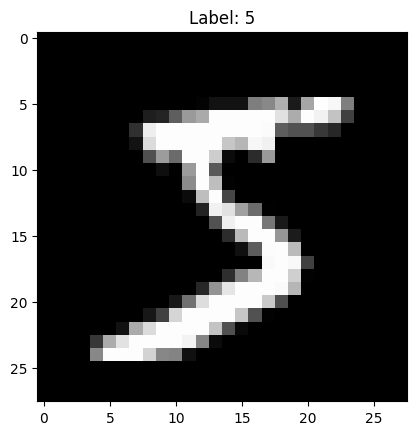

In [5]:
#display a few random images using matplotlib
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap="gray")
plt.title(f"Label: {y_train[0]}")
plt.show()

In [6]:
#Data preprocessing
#Normalize pixel values to 0 or 1

X_train = X_train/255.0
X_test = X_test/255.0

#Reshape data for cnn
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

#Convert labels to one-hot encoded vectors
from tensorflow .keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)


In [7]:
#Model Building Cnn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])


In [8]:
#Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    validation_split=0.1)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8657 - loss: 0.4413 - val_accuracy: 0.9858 - val_loss: 0.0493
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9786 - loss: 0.0693 - val_accuracy: 0.9902 - val_loss: 0.0353
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9861 - loss: 0.0470 - val_accuracy: 0.9910 - val_loss: 0.0319
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9888 - loss: 0.0364 - val_accuracy: 0.9912 - val_loss: 0.0292
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9908 - loss: 0.0278 - val_accuracy: 0.9900 - val_loss: 0.0314


In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9849 - loss: 0.0398
Test Accuracy: 0.9883999824523926


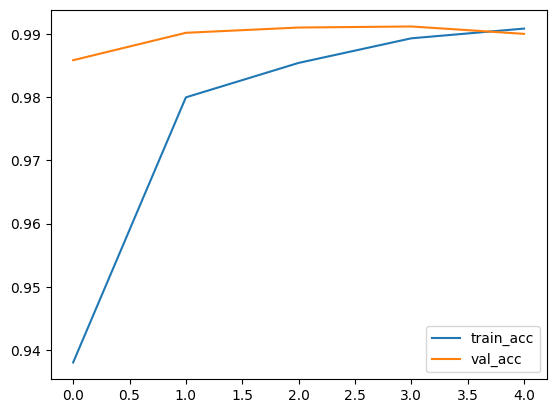

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted: 7


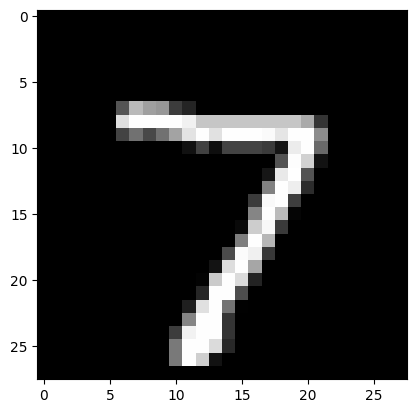

In [13]:
predictions = model.predict(X_test)
import numpy as np
plt.imshow(X_test[0].reshape(28,28), cmap='gray')
print("Predicted:", np.argmax(predictions[0]))


In [15]:
from google.colab import files
model.save('/content/mnist_digit_model.h5')
print("💾 Model saved as mnist_digit_model.h5")

# Step: Download the model directly
files.download('/content/mnist_digit_model.h5')

💾 Model saved as mnist_digit_model.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>